Instructions for updating:
If using Keras pass *_constraint arguments to layers.
11493376/11490434 [==============================] - 0s 0us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3819 - acc: 0.8953 - val_loss: 0.2066 - val_acc: 0.9422
Epoch 2/15
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1812 - acc: 0.9480 - val_loss: 0.1535 - val_acc: 0.9563
Epoch 3/15
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1334 - acc: 0.9612 - val_loss: 0.1273 - val_acc: 0.9626
Epoch 4/15
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1034 - acc: 0.9707 - val_loss: 0.1193 - val_acc: 0.9656
Epoch 5/15
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0846 - acc: 0.9757 - val_loss: 0.1072 - val_acc: 0.9697
Epoch 6/15
48000/48000 [==============================] - 1s 30us/sample - loss: 0.0709 - acc: 0.9792 - val_l

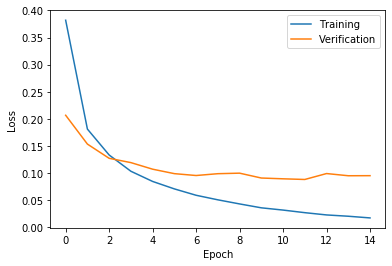

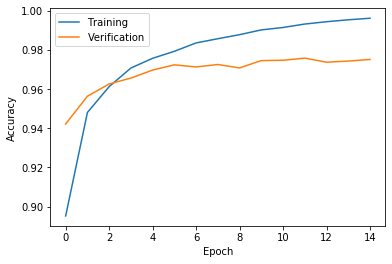

In [1]:
##############################################
# Modeling
##############################################
from tensorflow.keras import layers, models


def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])


class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])


##############################################
# Data
##############################################
import numpy as np
from tensorflow.keras import datasets  # mnist
from tensorflow.keras import utils  # to_categorical


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = utils.to_categorical(y_train)
    Y_test = utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)


##############################################
# Plotting
##############################################
import matplotlib.pyplot as plt


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    # plt.show()


##############################################
# Main
##############################################
def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class

    # model = ANN_models_func(Nin, Nh, Nout)
    # model = ANN_models_class(Nin, Nh, Nout)
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    ##############################################
    # Training
    ##############################################
    history = model.fit(X_train, Y_train, epochs=15, batch_size=100, validation_split=0.2)
    performace_test = model.evaluate(X_test, Y_test, batch_size=100, verbose=0)
    print('Test Loss and Accuracy ->', performace_test)

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()


# Run code
if __name__ == '__main__':
    main()

In [3]:
"""
CNN for image classification
- MIT License
- Author: Sungjin Kim
"""
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os

from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from . import skeras
from . import sfile


class CNN(Model):
    def __init__(model, nb_classes, in_shape=None):
        model.nb_classes = nb_classes
        model.in_shape = in_shape
        model.build_model()
        super().__init__(model.x, model.y)
        model.compile()

    def build_model(model):
        nb_classes = model.nb_classes
        in_shape = model.in_shape

        x = Input(in_shape)

        h = Conv2D(32, kernel_size=(3, 3), activation='relu',
                   input_shape=in_shape)(x)
        h = Conv2D(64, (3, 3), activation='relu')(h)
        h = MaxPooling2D(pool_size=(2, 2))(h)
        h = Dropout(0.25)(h)
        h = Flatten()(h)
        z_cl = h

        h = Dense(128, activation='relu')(h)
        h = Dropout(0.5)(h)
        z_fl = h

        y = Dense(nb_classes, activation='softmax', name='preds')(h)

        model.cl_part = Model(x, z_cl)
        model.fl_part = Model(x, z_fl)

        model.x, model.y = x, y

    def compile(model):
        Model.compile(model, loss='categorical_crossentropy',
                      optimizer='adadelta', metrics=['accuracy'])


class DataSet:
    def __init__(self, X, y, nb_classes, scaling=True, test_size=0.2, random_state=0):
        """
        X is originally vector. Hence, it will be transformed
        to 2D images with a channel (i.e, 3D).
        """
        self.X = X
        self.add_channels()

        X = self.X
        # the data, shuffled and split between train and test sets
        X_train, X_test, y_train, y_test = model_selection.train_test_split(
            X, y, test_size=0.2, random_state=random_state)

        print(X_train.shape, y_train.shape)

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')

        if scaling:
            # scaling to have (0, 1) for each feature (each pixel)
            scaler = MinMaxScaler()
            n = X_train.shape[0]
            X_train = scaler.fit_transform(
                X_train.reshape(n, -1)).reshape(X_train.shape)
            n = X_test.shape[0]
            X_test = scaler.transform(
                X_test.reshape(n, -1)).reshape(X_test.shape)
            self.scaler = scaler

        print('X_train shape:', X_train.shape)
        print(X_train.shape[0], 'train samples')
        print(X_test.shape[0], 'test samples')

        # convert class vectors to binary class matrices
        Y_train = np_utils.to_categorical(y_train, nb_classes)
        Y_test = np_utils.to_categorical(y_test, nb_classes)

        self.X_train, self.X_test = X_train, X_test
        self.Y_train, self.Y_test = Y_train, Y_test
        self.y_train, self.y_test = y_train, y_test
        # self.input_shape = input_shape

    def add_channels(self):
        X = self.X

        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape

            if K.image_dim_ordering() == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                X = X.reshape(X.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
        else:
            input_shape = X.shape[1:]  # channel is already included.

        self.X = X
        self.input_shape = input_shape


class Machine():
    def __init__(self, X, y, nb_classes=2, fig=True):
        self.nb_classes = nb_classes
        self.set_data(X, y)
        self.set_model()
        self.fig = fig

    def set_data(self, X, y):
        nb_classes = self.nb_classes
        self.data = DataSet(X, y, nb_classes)
        print('data.input_shape', self.data.input_shape)

    def set_model(self):
        nb_classes = self.nb_classes
        data = self.data
        self.model = CNN(nb_classes=nb_classes, in_shape=data.input_shape)
        # cnn_lenet(nb_classes=nb_classes, in_shape=data.input_shape)

    def fit(self, epochs=10, batch_size=128, verbose=1):
        data = self.data
        model = self.model

        history = model.fit(data.X_train, data.Y_train, batch_size=batch_size, epochs=epochs,
                            verbose=verbose, validation_data=(data.X_test, data.Y_test))
        return history

    def run(self, epochs=100, batch_size=128, verbose=1):
        data = self.data
        model = self.model
        fig = self.fig

        history = self.fit(epochs=epochs,
                           batch_size=batch_size, verbose=verbose)

        score = model.evaluate(data.X_test, data.Y_test, verbose=0)

        print('Confusion matrix')
        Y_test_pred = model.predict(data.X_test, verbose=0)
        y_test_pred = np.argmax(Y_test_pred, axis=1)
        print(metrics.confusion_matrix(data.y_test, y_test_pred))

        print('Test score:', score[0])
        print('Test accuracy:', score[1])

        # Save results
        suffix = sfile.unique_filename('datatime')
        foldname = 'output_' + suffix
        os.makedirs(foldname)
        skeras.save_history_history(
            'history_history.npy', history.history, fold=foldname)
        model.save_weights(os.path.join(foldname, 'dl_model.h5'))
        print('Output results are saved in', foldname)
          
        if fig:
            skeras.plot_acc_loss(history)

        self.history = history

        return foldname

ImportError: ignored